** A Support Vector Machine / Network is a discrimininative classifier formally defined by a seperating hyperplane. Given a labeled training dataset, the algorithm outputs an optimal hyperplane which categorizes new examples. Support Vectors try to fit the largest possible margin between the support vectors**

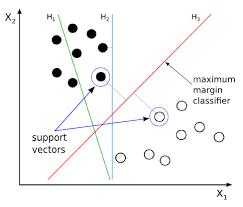

**Soft Margin Classification** - *is a balance between keeping the margin as large as possible whilst limiting the margin violations. Unlike Logistic Regression Classifiers, SVM classifiers do not output probabilities for each class* 

In [1]:
import warnings; warnings.simplefilter("ignore")
#importing important libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as  sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# datafile upload and data preparation
df = pd.read_csv("diffreport2.csv", sep= ",")

d1 = df.drop("name", axis = 1)
d2 = d1.drop("isotopes", axis = 1)
d3 = d2.drop("adduct", axis = 1)
d4 = d3.drop("tstat", axis = 1)
d5 = d4.drop("pvalue", axis = 1)
d6 = d5.drop("fold", axis = 1)
d7 = d6.drop(d6.columns[0], axis = 1)
d8 = d7.drop("npeaks", axis = 1)
d9 = d8.drop("Eta6", axis = 1)
d10 = d9.drop("Eta8", axis = 1)
columns = ['Eta6_0', 'Eta6_2', 'Eta6_3', 'Eta8.1', 'Eta82', 'Eta83', 'ID']
df1 = pd.DataFrame(d10, columns = columns)

In [3]:
# creation of train and testing sets

def get_train_test(df, y_col, x_cols, ratio):

    mask = np.random.rand(len(df)) > ratio
    df_train = df[mask]
    df_test = df[~mask]
       
    Y_train = df_train[y_col].values
    Y_test = df_test[y_col].values
    X_train = df_train[x_cols].values
    X_test = df_test[x_cols].values
    return df_train, df_test, X_train, Y_train, X_test, Y_test
 
y_col = 'ID'
x_cols = list(df1.columns.values)
x_cols.remove(y_col)
 
train_test_ratio = 0.7
df_train, df_test, X_train, Y_train, X_test, Y_test = get_train_test(df1, y_col, x_cols, train_test_ratio)

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline((("scaler", StandardScaler()), 
                   ("linear_scv", LinearSVC(C = 1, loss = "hinge")),
                   ))
svm_clf.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_scv', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

## Non-Linear Support Vector Machine Classification


**Polynomial Feature Addition** -*one approach to handling nonlinear datasets is to add more features and this will result in  linearly seperable dataset. At low polynomial degree, implementation of polynomial features fails to handle complex datasets and with large polynomial degree, it creates a high number of features that make the model too slow*

In [8]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
                            ("poly_features", PolynomialFeatures(degree = 3)),
                            ("scaler", StandardScaler()),
                             ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
))

polynomial_svm_clf.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

**Kernel Trick** - *is a method that avoids the explicit mapping that is needed to get linear learning algorithms to learn a nonlinear function or decision boundary, making it possible to get the same result as if one had added polynomial features.There is no combinatorial explosion of features since one does not add any features*

In [11]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel = "poly", degree = 3, coef0=1, C = 5))
))
poly_kernel_svm_clf.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

**Similarity Feature** - *is based on a similarity function and it measures how much each instance resembles a particular landmark* *Defined below is the* **Gaussian Radial Bias Function**

$$\phi\gamma(x, l) = exp(-\gamma\lvert\lvert x-l \rvert \rvert ^2) $$

In [10]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001)) # gamma is the regularization hyperparameter
))
rbf_kernel_svm_clf.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

**SVM Regression** - *in this instance, the objective is reversed, instead of trying to fit the largest possible margin between two classes whilst limiting margin violations, the method tries to fit as many instances as possible in the margin whilst limiting margin  violations(instances that are not in the margin)*

In [9]:
from sklearn.svm import LinearSVR

svm_reg= LinearSVR(epsilon = 1.5)
svm_reg.fit(X_train,Y_train)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

**Decision Function and Predictions** *Linear SVM classifier model predicts the class of a new instance x by simply computing the decision function as shown*

$$ \hat{y} = \begin {cases} 0, & \text {if}\ w^T * x + b < 0 \\ 1, & \text {if} \  w^T* x + b >= 0 \end {cases}$$

*The hard margin linear SVM Classifier objective can be expressed as a constrained optimization problem*

*minimize *                    $$ \frac{1}{2}w ^ T * w $$

*The soft margin linear SVM Classifier objective is given as*
*minimize*                     $$ \frac{1}{2}w^T * w + C\sum_{i = 1} ^{m}\zeta ^{(i)}$$

*Hard margin and soft margin problems are both convex quadratic optimization problems with linear constraints(Quadratic Programming Problems). The general quadratic programming problem is given by *

$$ \frac{1}{2}p^ T*H* p + f^T * p $$

Given a constrained optimization problem, known as the **primal problem**, it is possible to express a different but closely related problem, called its **dual problem**, which under some conditions, can have the same solutions or the upper bounds of the solution as the primal problem.
*Dual solution to the primal solution*

$$ \hat{w} = \sum_{i = 1}^{m}  \hat{ \alpha} t ^{(i)} x^{(i)} $$

*The dual problem is faster is to solve than the primal when the number of training instances is smaller than the number of features*

List of commonly used kernels

** Linear Kernel**
**Polynomial Kernel**
**Gaussian RBF**
**Sigmoid**

**Mercer's Theorem** - *If a function $K(a,b)$ respects a few mathematical conditions called Mercer's conditions (K must be continous, symmetric in its arguments so $K(a,b) = K(b,a)$, then there exists a function $\phi$ that maps **a** and **b** into another space, possibly with higher dimensions, such that $K(a, b) = \phi(a)^T*\phi(b)$

*For linear SVM classifiers, one method is to use Gradient Descent to minimize the cost function which is derived from the primal problem but unfortunately, converges more slowly than the other methods based on QP *

**Linear SVM classifier cost function**

$$ j(w, b) = \frac{1}{2}w^T * w +C \sum_{i= 1}^{m} max(0,1 -t^{(i)}(w^T * x^{(i)} + b)) $$

*with $max(0, 1-t)$ being the hinge loss function*